# Proyecto final Felix Curiel E-8-167500 8 diciembre 2022

In [1]:
#Importacion de librerias
import re 
from selenium import webdriver
from selenium.webdriver.common.by import By
import time 
from bs4 import BeautifulSoup
from requests import get
import pandas as pd
from datetime import datetime


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-tou
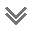

In [2]:
#se empieza a utilizar el link y beautifulsoup para extraer data de la pagina web
link = "https://www.worldometers.info/coronavirus/"
response = get(link)
soup = BeautifulSoup(response.text, 'html.parser')
soup


In [3]:
#variables de prueba para buscar en el link tipo html
soup.find('p')
soup.find('div')
soup.find(id='p')

In [4]:
#extraccion de la tabla en el link elegido
info_covid = soup.find_all("div", class_="main_table_countries_div")

In [5]:
#extraccion de la data del dia de hoy de la tabla en el link elegido
cuadro_covid = soup.find("div", id="nav-today")

In [6]:
#impresion para ver documentacion html
cuadro_covid

<div aria-labelledby="nav-today-tab" class="tab-pane active" id="nav-today" role="tabpanel">
<div class="main_table_countries_div">
<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">New<br>Recovered</br></th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width=

In [7]:
#convertir a string la tabla
cuadro_covid = str(cuadro_covid)

In [8]:
#Uso de expresiones regulares
cuadro_covid = re.sub(r'<.*?>', lambda g: g.group(0).upper(), cuadro_covid)
cuadro_covid

'<DIV ARIA-LABELLEDBY="NAV-TODAY-TAB" CLASS="TAB-PANE ACTIVE" ID="NAV-TODAY" ROLE="TABPANEL">\n<DIV CLASS="MAIN_TABLE_COUNTRIES_DIV">\n<TABLE CLASS="TABLE TABLE-BORDERED TABLE-HOVER MAIN_TABLE_COUNTRIES" ID="MAIN_TABLE_COUNTRIES_TODAY" STYLE="WIDTH:100%;MARGIN-TOP: 0PX !IMPORTANT;DISPLAY:NONE;">\n<THEAD>\n<TR>\n<TH WIDTH="1%">#</TH>\n<TH WIDTH="100">Country,<BR>Other</BR></TH>\n<TH WIDTH="20">Total<BR>Cases</BR></TH>\n<TH WIDTH="30">New<BR>Cases</BR></TH>\n<TH WIDTH="30">Total<BR>Deaths</BR></TH>\n<TH WIDTH="30">New<BR>Deaths</BR></TH>\n<TH WIDTH="30">Total<BR>Recovered</BR></TH>\n<TH WIDTH="30">New<BR>Recovered</BR></TH>\n<TH WIDTH="30">Active<BR/>Cases</TH>\n<TH WIDTH="30">Serious,<BR/>Critical</TH>\n<TH WIDTH="30">Tot\xa0Cases/<BR/>1M pop</TH>\n<TH WIDTH="30">Deaths/<BR/>1M pop</TH>\n<TH WIDTH="30">Total<BR/>Tests</TH>\n<TH WIDTH="30">Tests/<BR/>\n<NOBR>1M pop</NOBR>\n</TH>\n<TH WIDTH="30">Population</TH>\n<TH STYLE="DISPLAY:NONE" WIDTH="30">Continent</TH>\n<TH WIDTH="30">1 Case<BR/

In [9]:
#dataframe de la tabla del link elegido 
df = pd.read_html(cuadro_covid)[0]

In [10]:
#primeros 5 valores de la tabla
df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/ 1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,NaN,North America,119746965,18.0,1568177.0,NaN,114957994.0,2458.0,3220794.0,8817.0,...,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Asia,200907422,238061.0,1501236.0,429.0,191183059.0,94747.0,8223127.0,9515.0,...,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Europe,239792455,91381.0,1965714.0,165.0,233762091.0,94526.0,4064650.0,7780.0,...,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,South America,65567647,5336.0,1337102.0,54.0,63285000.0,10472.0,945545.0,10190.0,...,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Oceania,13147388,4291.0,22459.0,20.0,12789328.0,18.0,335601.0,144.0,...,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#ubicacion en donde estoy
pwd

'C:\\Users\\felic\\OneDrive\\Documents\\tareas utp\\5 año\\Cursopython'

In [13]:
#exportacion de la tabla de html a excel
import os
df.to_excel('excel/DataPanoramaCovid1.xlsx')

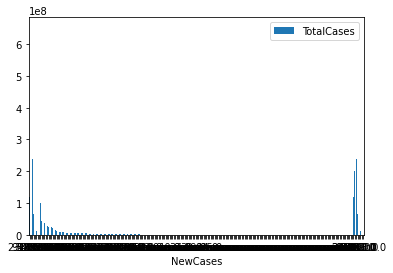

In [14]:
#importacion de librerias de matplotlib e impresion de la grafica en python
import matplotlib.pyplot as plt
#excelinfo = 'excel/DataPanoramaCovid.xlsx'
valores = df[["NewCases","TotalCases"]]
ax = valores.plot.bar(x="NewCases", y = "TotalCases", rot=0)
plt.show()